In [ ]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

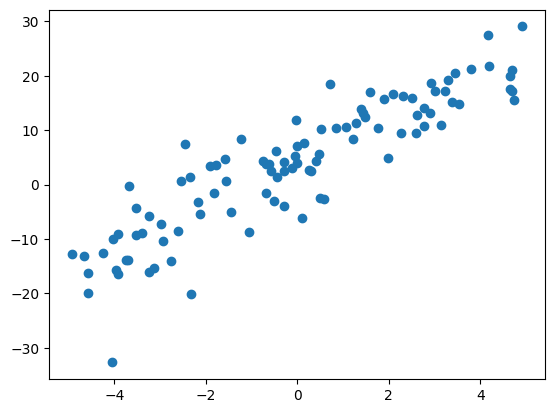

In [ ]:
# Generate Random Data
n = 100
X = 10* np.random.random(n) - 5 # X in range (-5, 5)
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n) #Y is generated from the equation: Y = 4X + 3 + noise where noise is Gaussian with mean 0 and std deviation 5.

plt.figure()
plt.scatter( X, Y)


Final values after gradient descent: a = 4.009992541784649, b = 3.974205046030109


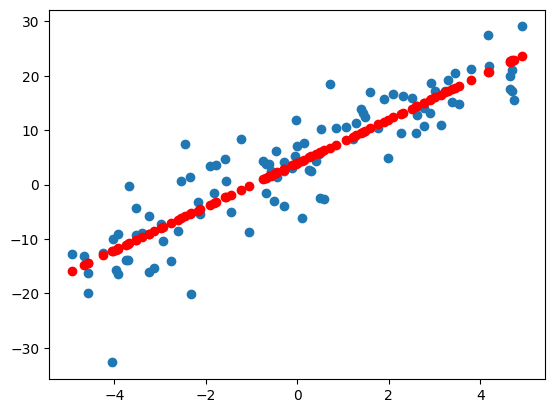

In [ ]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.01
dc_da = 0
dc_db =0
#define your descend function here
def des_fun(X,Y,a,b,n):
  dc_da = 0
  dc_db = 0
  for i in range(n):
    dc_da = dc_da+(2/n)*(Y_based_on_X(X[i],a,b) - Y[i])*X[i]

  for i in range(n):
    dc_db = dc_db+(2/n)*(Y_based_on_X(X[i],a,b) - Y[i])
  return dc_da, dc_db

num_iterations = 1000
for _ in range(num_iterations):
  dc_da, dc_db = des_fun(X,Y,a,b,n)
  a = a - l * dc_da
  b = b - l * dc_db

print(f"Final values after gradient descent: a = {a}, b = {b}")

plt.figure()
plt.scatter(  X,Y)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

Final values after gradient descent: a = 3.9652906181389653, b = 4.224450710974223


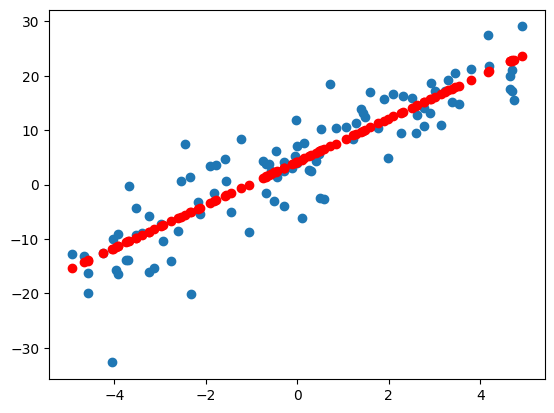

In [ ]:
# Prediction function
def Y_based_on_X(x, a, b):
    return a * x + b

# Mini-Batch SGD function
def sgd(X, Y, a, b, l, m):
    for i in range(0, 1000, m):
      dc_da = 0
      dc_db = 0
      for j in range(i, min(i + m, n)):
        error = Y_based_on_X(X[j], a, b) - Y[j]
        dc_da = dc_da + (2 / m) * error * X[j]
        dc_db = dc_db + (2 / m) * error

        a = a - l * dc_da
        b = b - l * dc_db

    return a, b

a, b = 0, 0
l = 0.01
iterations = 1000
m = 100

for _ in range(iterations):
    a, b = sgd(X, Y, a, b, l, m)

print(f"Final values after gradient descent: a = {a}, b = {b}")

plt.figure()
plt.scatter(  X,Y)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

In [ ]:
# Closed form SOlution
# Go through this code. This code is just for learning the closed form solution
#This closed-form solution snippet implements Ordinary Least Squares (OLS) linear regression using matrix algebra, also known as the Normal Equation

X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[3.97420505],
        [4.00999254]])

As you can see the values that we get for the model are extremely close to the 3 and 4 parameters that we initially set up.

TO TRY:
1. Try varying n and see how that affects the accuracy.
2. Implement the same using GD.
3. Implement the same using SGD with m = 100 and n = 1000.